## Group 6 Project PML

### Handwritten Digit Recogonition using Convolution Neural Network

M.Visweswaran [CB.EN.U4AIE20075]

Vishnu Radhakrishnan [CB.EN.U4AIE20074]

Thushit Kumar R [CB.EN.U4AIE20072]

Menta Sai Akshay [CB.EN.U4AIE20040]

Krishnan K M [CB.EN.U4AIE20031]

In [2]:
# Importing imported packages
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import LearningRateScheduler

DATA EXTRACTION AND FILTERING

In [3]:
# Download MNIST Dataset
train, test = tfds.as_numpy(tfds.load(
    'mnist',
    split=['train','test'], 
    batch_size=-1, 
    as_supervised=True,
))

trainX, trainY = train[0], train[1]
testX, testY = test[0], test[1]

# Filtering (To Range [0-1])
trainX_rescale = trainX/ 255.
testX_rescale = testX / 255.
trainY_onehot = tf.one_hot(trainY, 10)
testY_onehot = tf.one_hot(testY, 10)

    'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
})> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'


    'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
})> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'


    'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
})> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'
    'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
})> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'


    'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
})> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'


    'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
})> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'


ONE EXAMPLE FROM DATASET

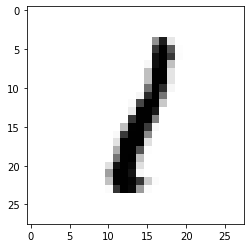

In [4]:
def show_num(index):
  img_arr = trainX[index, :, :, :]
  to_show = np.squeeze(img_arr) # As plt.imshow works with only 2D arrays we convert (28,28,1) => (28,28)
  plt.imshow(to_show, cmap='Greys')
  plt.show()
show_num(5)

LENET-5 MODEL

In [5]:
model = tf.keras.Sequential() # Intialising the model

In [6]:
# Creating Lenet-5 layers

model.add(Conv2D(6, kernel_size=(5,5), input_shape = (28,28,1), activation='relu', padding='same', name="C1"))
model.add(Conv2D(6, (2,2), strides=2, name="S2", activation='relu'))
model.add(Dropout(0.4))
model.add(Conv2D(16, (5,5), activation='relu', name='C3'))
model.add(Conv2D(16, (2,2), strides=2, activation='relu',name="S4"))
model.add(Conv2D(120, (5,5), activation='relu', name="C5"))
model.add(Flatten())
model.add(Dense(84, activation='relu', name='F6'))
model.add(Dense(10, activation='softmax', name='OUTPUT'))

OVERALL SUMMARY

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
C1 (Conv2D)                  (None, 28, 28, 6)         156       
_________________________________________________________________
S2 (Conv2D)                  (None, 14, 14, 6)         150       
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 6)         0         
_________________________________________________________________
C3 (Conv2D)                  (None, 10, 10, 16)        2416      
_________________________________________________________________
S4 (Conv2D)                  (None, 5, 5, 16)          1040      
_________________________________________________________________
C5 (Conv2D)                  (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten (Flatten)            (None, 120)               0

FUNCTION FOR LEARNING RATE BASED ON EPOCH CYCLE

In [8]:
# Learing rate based on the epochs cycles
def scheduler(epoch):
  if epoch<=2:
    return(0.0005)
  elif (epoch>2 and epoch<=5):
    return(0.0002)
  elif (epoch>5 and epoch<=8):
    return(0.0001)
  elif (epoch>8 and epoch<=12):
    return(0.00005)
  else:
    return(0.00001)


def scheduler2(epoch):
  if epoch < 10:
    return 0.001
  else:
    return 0.001 * tf.math.exp(0.1 * (10 - epoch))

# adding my own modification to decrease the learning rate further
callback = LearningRateScheduler(scheduler)
callback2 = LearningRateScheduler(scheduler2)
model.compile(loss = "categorical_crossentropy", optimizer='adam', metrics=["accuracy"])

TRAINING THE MODEL AND TESTING

In [9]:
history = model.fit(trainX_rescale, trainY_onehot, epochs=10, validation_data=(testX_rescale, testY_onehot), verbose=1, callbacks=[callback])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 15s 257us/sample - loss: 0.3352 - accuracy: 0.8936 - val_loss: 0.0938 - val_accuracy: 0.9708
Epoch 2/10
60000/60000 [==============================] - 14s 230us/sample - loss: 0.1120 - accuracy: 0.9654 - val_loss: 0.0580 - val_accuracy: 0.9813
Epoch 3/10
60000/60000 [==============================] - 15s 245us/sample - loss: 0.0819 - accuracy: 0.9743 - val_loss: 0.0464 - val_accuracy: 0.9846
Epoch 4/10
60000/60000 [==============================] - 15s 248us/sample - loss: 0.0549 - accuracy: 0.9826 - val_loss: 0.0395 - val_accuracy: 0.9862
Epoch 5/10
60000/60000 [==============================] - 15s 246us/sample - loss: 0.0509 - accuracy: 0.9840 - val_loss: 0.0375 - val_accuracy: 0.9867
Epoch 6/10
60000/60000 [==============================] - 15s 242us/sample - loss: 0.0457 - accuracy: 0.9854 - val_loss: 0.0360 - val_accuracy: 0.9882
Epoch 7/10
60000/60000 [====================

PLOTS

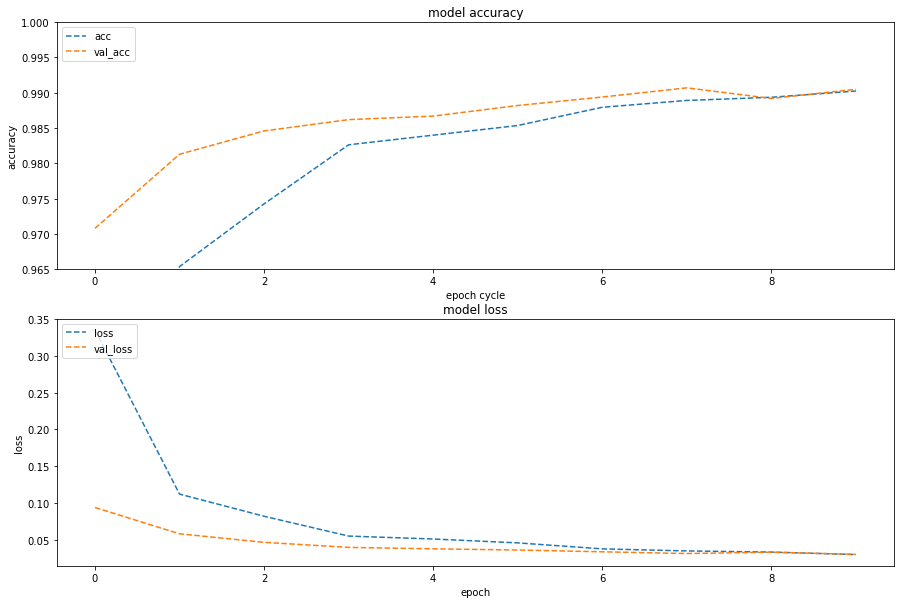

In [12]:
plt.figure(figsize=(15,10))

# Plot Accurarcy vs Epoch Cycle
plt.subplot(211)
plt.plot(history.history['accuracy'], '--', label='acc')
plt.plot(history.history['val_accuracy'], '--',label='val_acc')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch cycle')
plt.legend(loc='upper left')
axes=plt.gca()
axes.set_ylim([0.965, 1])

# Plot Loss vs Epoch Cycle
plt.subplot(212)
plt.plot(history.history['loss'], '--', label='loss')
plt.plot(history.history['val_loss'], '--',label='val_loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper left')
axes=plt.gca()

plt.show()

SAVING THE MODEL

In [11]:
model.save("trained_model.hdf5")